# Assignment 5: PCA and Clustering (40 marks)
### Due: December 6 at 11:59pm 
(Dropbox will remain open until December 8 at 11:59pm)

### Name: Tahmid Kazi

The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Principle Component Analysis (PCA) (18 marks)

### Step 1. Load data (2 marks)

You have been asked by an agricultural company to help them predict the type of wheat based on kernel characteristics. You have been given all the information you need in the seeds_dataset.txt file on D2L. The original dataset can be found [here](https://archive.ics.uci.edu/dataset/236/seeds)

The first step is to read in the file using pandas and inspect the first few columns. Note that the data is in a text file, so the separator is different compared to a csv file.

In [2]:
# TODO: Import dataset and inspect the first five columns
columns = ['area', 'perimeter', 'compactness', 'length_of_kernel', 'width_of_kernel', 'asymmetry', 'length_groove', 'class']

seeds = pd.read_csv('seeds_dataset.txt', delimiter='\t', header=None, names=columns)

seeds.head()

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry,length_groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Next, you will need to separate the data into your feature matrix and target vector.

In [3]:
# TODO: Separate the data into feature matrix and target vector. Print the shape of X and y
X = seeds.drop('class', axis=1)
y = seeds['class']

print(X.shape)
print(y.shape)

(210, 7)
(210,)


### Step 2: Preprocessing (2 marks)

To preprocess the data, we will need to scale the data. Which scaler would you select and why? *(1 mark)* 

I chose the StandardScaler to make the features centered around 0 with a standard deviation of 1. PCA aims to capture the principal components of the maximum variance in the data, if the features have different scales, those with larger variance may dominate the principal components. Using Standard Scaling ensures that each feature contributes equally to the variance calculation.

Before we implement the scaler, we need to split the data into training and testing sets first.

In [4]:
# TODO: Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [5]:
# TODO: Print the shape of the training feature matrix and target vector
print(X_train.shape)
print(y_train.shape)

(168, 7)
(168,)


Now that we have our training data, we can implement our selected scaler.

In [6]:
# TODO: Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 3: Model Selection (1 mark)

The next step is to instantiate our selected model. In this case, we will be using `LogisticRegression()`

In [8]:
# TODO: Instantiate model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()


### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [9]:
param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
             'fit_intercept': [True, False]}

In [10]:
#TODO: Implement the grid search and print the best parameters, cross-validation score and test score
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(lr, param_grid, cv=5)

grid.fit(X_train_scaled, y_train)

print("Best Parameters: ", grid.best_params_)
print("Cross Validation Score: ", grid.best_score_)
print("Test Score: ", grid.score(X_test_scaled, y_test))

Best Parameters:  {'C': 10.0, 'fit_intercept': True}
Cross Validation Score:  0.9468805704099822
Test Score:  0.9523809523809523


### Step 5: Visualize using PCA (3 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

In [11]:
# TODO: Predict y labels using best estimator
y_pred = grid.best_estimator_.predict(X_test_scaled)

In [12]:
# TODO: Reduce dimensions of test data for plotting
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_test_pca = pca.fit_transform(X_test_scaled)

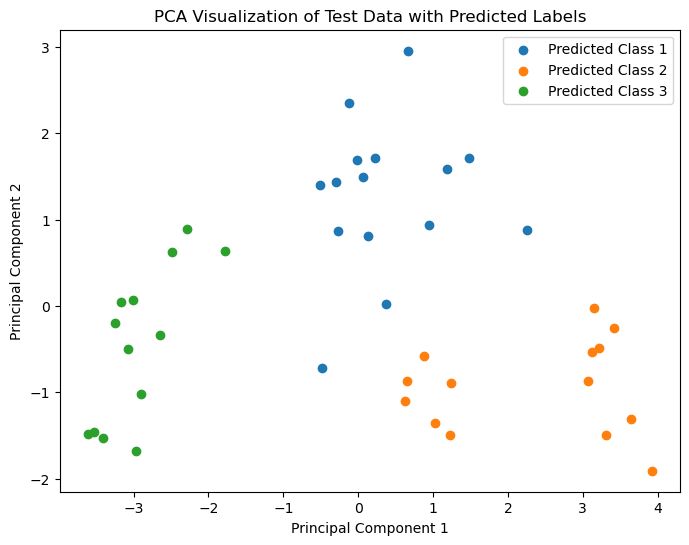

In [13]:
# TODO: Plot test points colored by predicted label
plt.figure(figsize=(8, 6))

for label in set(y_pred):
    plt.scatter(X_test_pca[y_pred == label, 0], X_test_pca[y_pred == label, 1],
                label=f'Predicted Class {label}')

plt.title('PCA Visualization of Test Data with Predicted Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

#### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? *(2 marks)*
1. Did PCA work well for this model? How does this relate to the results from the model used? *(2 marks)*

*ANSWER HERE*
1. Yes the Logistic Regression model worked will having cross validation score of 0.95 and a test score of 0.95 demonstrating low bias and low variance.
2. Based on the output plot above, it seems to have worked well as the labels look to be grouped together in the respective sections of the plot. As PCA and logistic regression are linear and performed well, it can be assumed that the data provided would also be linear.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*
1. The data was sourced from the in class examples (Dimensionality Reduction), previous assignment submissions and the Labs, particularly Lab 8.
2. The steps were completed in order as provided.
3. No generative AI was used in this section.
4. No noted challenges in the actual ML part, a bit more time was taken to figure out how to build and display the PCA plot. Very straightforward as we have the examples and labs are descriptive for PCA and the rest has been repeated a few times.

## Part 2. Implement clustering (20 marks)

The agricultural company approaches you again because they lost all the labels for their data. Use the Kmeans clustering method to assign labels to the seeds dataset used in Part 1.

### Step 1: Cluster using original data (6 marks)

This part of the assignment asks you to implement Kmeans clustering using the orginal feature matrix (after scaling has been performed). 

In [14]:
# TODO: Scale feature matrix
X_scaled = scaler.fit_transform(X)

The first step is to use the elbow method to determine the optimal number of clusters. In this case, you can use the distortion metric.

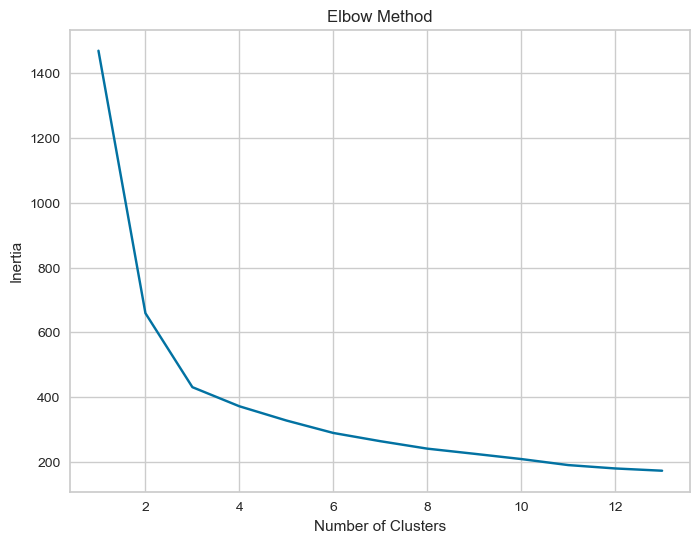

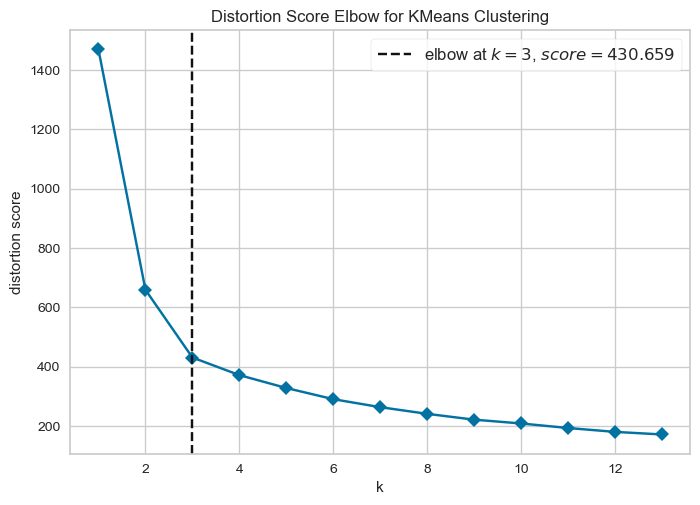

In [15]:
# TODO: Use the elbow method to determine the optimal number of clusters
from sklearn.cluster import KMeans
from yellowbrick.cluster import kelbow_visualizer
import warnings 
warnings.filterwarnings('ignore')

inertia = []

for n_clusters in range(1, 14):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 14), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

ke = kelbow_visualizer(KMeans(random_state=54, n_init=10), X_scaled, k=(1, 14), timings=False, metric='distortion')

Next, implement Kmeans and calculate the following validation metrics:
- Silhouette score
- Calinski-Harabasz score
- Davies-Bouldin score

In [16]:
# TODO: Implement K-means with the number of clusters determined in the previous step
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Optimal clusters from kelbow_visualizer
n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X_scaled)

cluster_labels = kmeans.labels_

In [17]:
# TODO: Calculate the three different validation metrics
sil_score1 = silhouette_score(X_scaled, cluster_labels)
cal_score1 = calinski_harabasz_score(X_scaled, cluster_labels)
dav_score1 = davies_bouldin_score(X_scaled, cluster_labels)

print("Silhouette Score: ", sil_score1)
print("Calinski Harabasz Score: ", cal_score1)
print("Davies Bouldin Score: ", dav_score1)

Silhouette Score:  0.40072705527512986
Calinski Harabasz Score:  249.7841749161647
Davies Bouldin Score:  0.9278712249013426


Plot the clustering results using PCA. Remember to color each data point based on the cluster label.

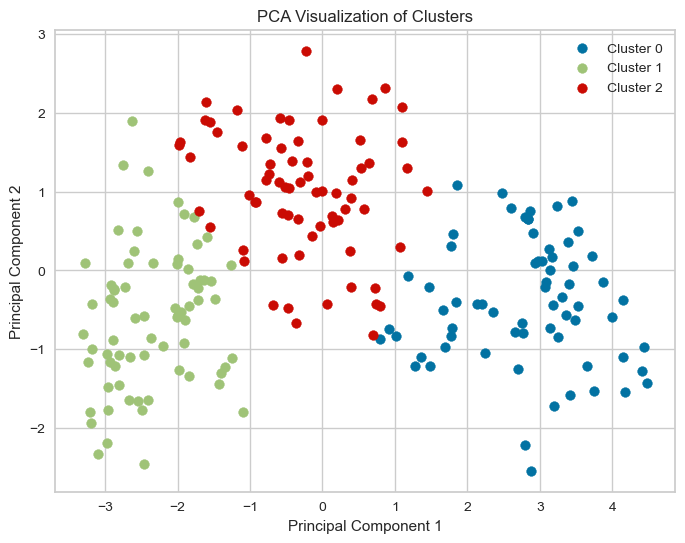

In [18]:
# TODO: Plot clustering results
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
for label in set(cluster_labels):
    plt.scatter(X_pca[cluster_labels == label, 0], X_pca[cluster_labels == label, 1],
                label=f'Cluster {label}')

plt.title('PCA Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

### Step 2: Cluster using PCA-transformed data (4 marks)

Implement Kmeans clustering using PCA-transformed data. The first step is to use the explained variance ratio to find the number of components required to explain at least 95% of the variance.

In [19]:
# TODO: Find the number of principal components using explained variance ratio
pca = PCA()
pca.fit(X_scaled)

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

num_components = np.argmax(cumulative_variance_ratio >= 0.95)

print("Number of Principal Components: ", num_components)


Number of Principal Components:  2


Next, transform the data using PCA, implement Kmeans and calculate the three validation metrics used in the previous step.

In [20]:
# TODO: Use PCA to transform the data
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)

In [21]:
# TODO: Implement K-means with the transformed data
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

In [22]:
# TODO: Calculate the three different validation metrics
sil_score2 = silhouette_score(X_pca, cluster_labels)
cal_score2 = calinski_harabasz_score(X_pca, cluster_labels)
dav_score2 = davies_bouldin_score(X_pca, cluster_labels)


print("Silhouette Score: ", sil_score2)
print("Calinski Harabasz Score: ", cal_score2)
print("Davies Bouldin Score: ", dav_score2)

Silhouette Score:  0.4934304869603192
Calinski Harabasz Score:  397.30107838636786
Davies Bouldin Score:  0.7066734757979803


### Step 3: Display results (2 marks)

Print the results for Steps 2 and 3 in a table. Include column and row labels

In [23]:
# TODO: Display results

metrics_scaled = {
    'Silhouette Score': sil_score1,
    'Calinski-Harabasz Score': cal_score1,
    'Davies-Bouldin Score': dav_score1
}

metrics_pca = {
    'Silhouette Score': sil_score2,
    'Calinski-Harabasz Score': cal_score2,
    'Davies-Bouldin Score': dav_score2
}

df_scaled = pd.DataFrame.from_dict(metrics_scaled, orient='index', columns=['Scaled'])
df_pca = pd.DataFrame.from_dict(metrics_pca, orient='index', columns=['PCA'])

df = pd.concat([df_scaled, df_pca], axis=1)
df

,Scaled,PCA
Silhouette Score,0.400727,0.493430
Calinski-Harabasz Score,249.784175,397.301078
Davies-Bouldin Score,0.927871,0.706673


#### Questions (4 marks)

1. Did the optimal number of clusters make sense based on the context? *(1 mark)*
1. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results? *(1 mark)*
1. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not? *(2 marks)*


*ANSWER HERE*
1. The seeds data set has 3 possibilities for classification and the kelbow_visualizer also determined that the optimal number of clusters was 3, which makes sense for the context.
2. Yes the plots have similar distributions for the 3 classes, where one is near the bottom left, one near the middle top, and one near the bottom right.
3. Using the explained variance ratio, it was determined that 2 components would be used to explain 95% of the variance. PCA did improve the results, where the initial Silhouette score was 0.40, the score increased to 0.49 (where a higher score indicates better defined clusters with appropriate distances between the clusters), the Calinski-Harabasz score increased from 249.78 to 397.30 (where a higher score means higher inter-cluster distances compared to intra-cluster distances) and the Davies-Bouldin score decreased from 0.93 to 0.71 (where a lower score indicates that there is better separation between clusters). PCA will reduce the dimensionality of the data, retaining most of the variance in the original data so reducing the number of dimensions can make clustering algorithms perform better by focusing on the most relevant features.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*
1. The code was sourced from the class examples (Dimensionality Reduction and Clustering) and Lab 8.
2. The steps were completed in order as described.
3. Generative AI was not used for code but I did use it to better understand the differences between the scoring types for the clustering.
4. No significant challenges, the class examples and labs helped a lot since they were so detailed and thorough at explaining the content and code. 

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

I liked how this demonstrated how PCA can be used to improve clustering results, as in conceptually it's easy to understand, but hard to wrap your head around the practical use, so it was interesting to see a successful application. The examples and labs are very informative and very helpful in completing this assignment. The actual math behind how this works is confusing.